In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from gensim.models import keyedvectors

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data = pd.read_csv('topics.csv', encoding="ISO-8859-1")
data.head(5)

,title,content,content_word_count,published_date,created_at,updated_at,language,article_links,total_share_count,keywords_status,...,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,geo_locations,topic
0,Mitsubishi Motors Co. (OTCMKTS:MMTOF) Short In...,29c9689e5ed81852967ff964f16be109a37dd9ecb1f5c9...,221.0,2023-04-19 7:26,2023-04-19 7:37,2023-04-19 7:37,en,['https://www.marketbeat.com/stocks/OTCMKTS/MM...,0.0,True,...,False,False,False,False,False,False,NaN,NaN,NaN,business
1,Juventus off the hook! Bianconeri set to have ...,b9e3313535ffdbc2fe198572f17ce61330980dfab64324...,225.0,2023-04-19 6:23,2023-04-19 6:44,2023-04-19 7:49,en,['https://www.gazzetta.it/Calcio/Serie-A/Juven...,0.0,True,...,False,False,False,False,False,False,NaN,NaN,NaN,sports
2,Dodgers ponder shortstop for Betts after pater...,2e7bdbd8a033973c2309948b0b1b9de02bf7491e7b464c...,389.0,2023-04-18 0:00,2023-04-19 6:39,2023-04-19 6:39,en,NaN,0.0,True,...,False,False,False,False,False,False,NaN,NaN,NaN,sports
3,"Meta lays off tech teams, battering employee m...",d4e3c5c938a4c636d40cac488f32cda1cdc02c6372a5f9...,379.0,2023-04-19 5:27,2023-04-19 6:04,2023-04-19 7:00,en,"['/', '/news/most-popular-news', '/news/econom...",1.0,True,...,False,False,False,False,False,False,NaN,NaN,NaN,technology
4,FDA clears extra COVID booster for some high-r...,cfd7f633608c252af099ccb7f4a5a02eed9e7c68efe6fb...,856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,"['https://abcnews.go.com/alerts/Vaccinations',...",0.0,True,...,False,False,False,False,False,False,['washington'],['united kingdom'],"[{'country': 'GB', 'coordinates': [-1.51667, 5...",health


In [4]:
# shape of the data
data.shape

(10001, 30)

In [5]:
data.describe()

,content_word_count,total_share_count,sentiment,title_sentiment
count,10000.000000,9999.000000,9984.000000,5107.000000
mean,515.306900,277.081008,16.694111,0.281183
std,804.974659,4983.928745,42.877577,2.913501
min,5.000000,0.000000,-309.000000,-14.000000
25%,197.000000,0.000000,-2.000000,-2.000000
50%,378.000000,0.000000,11.000000,1.000000
75%,661.000000,2.000000,32.000000,2.000000
max,57135.000000,313687.000000,629.000000,17.000000


In [6]:
data.dtypes

title                  object
content                object
content_word_count    float64
published_date         object
created_at             object
updated_at             object
language               object
article_links          object
total_share_count     float64
keywords_status        object
keywords               object
entities               object
sentiment             float64
title_sentiment       float64
keywords_ex            object
infographic            object
case_study             object
review                 object
video                  object
podcast                object
webinar                object
interview              object
quote                  object
meme                   object
give_away              object
quiz                   object
cities_and_states      object
countries              object
geo_locations          object
topic                  object
dtype: object

In [7]:
data.isnull().sum()

title                    1
content                  1
content_word_count       1
published_date           1
created_at               1
updated_at               1
language                 1
article_links         2897
total_share_count        2
keywords_status         22
keywords                22
entities                22
sentiment               17
title_sentiment       4894
keywords_ex             17
infographic              3
case_study               3
review                   3
video                    3
podcast                  3
webinar                  3
interview                3
quote                    3
meme                     3
give_away                3
quiz                     3
cities_and_states     6662
countries             6662
geo_locations         6662
topic                    0
dtype: int64

There aer almost objects in dataset which need to label encoding in ipcoming steps.

In [8]:
# remove unwanted columns
drop_clm = ['content', 'article_links', 'geo_locations', 'title_sentiment']
data = data.drop(columns= drop_clm)
data.shape

(10001, 26)

In [9]:
data = data.dropna()

In [10]:
data.shape

(3339, 26)

<AxesSubplot:title={'center':'Unique values'}>

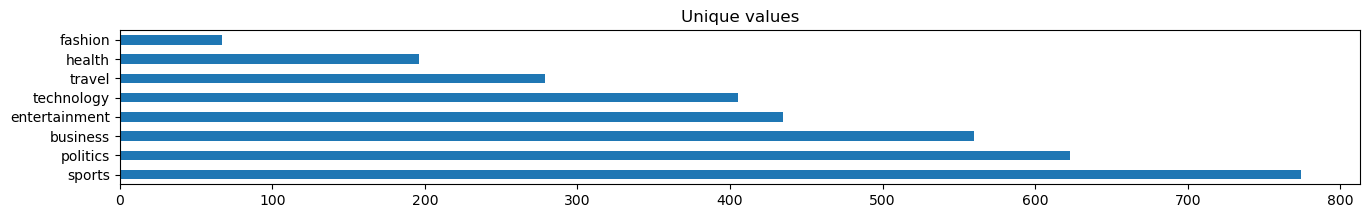

In [11]:
# Unique value in sentiment column with their frequency
sentiment_c = data['topic'].value_counts()
sentiment_c.plot(kind='barh', figsize=(16, 2), title='Unique values')

In [12]:
# Check duplicate values into data
print("Total duplicate values in dataset: ", data.duplicated(keep='last').sum())

Total duplicate values in dataset:  0


In [13]:
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
4,FDA clears extra COVID booster for some high-r...,856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,0.0,True,"['risk', 'vaccine', 'booster', 'spring', 'regu...","['Peter Marks', 'Moderna', 'Matthew Laurens', ...",...,False,False,False,False,False,False,False,['washington'],['united kingdom'],health


Data preprocessing

In [14]:
# create again string to apply tokenizer
def array_to_string(txt):
    try:
        str = ""
        for i in txt:
            str = str + i + ""
        return str
    except Exception as err:
        return err
    
data['keywords'] = data['keywords'].apply(lambda i: array_to_string(i))
data['entities'] = data['entities'].apply(lambda i: array_to_string(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: array_to_string(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: array_to_string(i))
data['countries'] = data['countries'].apply(lambda i: array_to_string(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
4,FDA clears extra COVID booster for some high-r...,856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,0.0,True,"['risk', 'vaccine', 'booster', 'spring', 'regu...","['Peter Marks', 'Moderna', 'Matthew Laurens', ...",...,False,False,False,False,False,False,False,['washington'],['united kingdom'],health


In [15]:
# Remove punctuation from data for example '!@#$%^&*()_+'
import string
print("String punctuation: ", string.punctuation)

String punctuation:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
data['title'][4]

'FDA clears extra COVID booster for some high-risk Americans'

In [17]:
# Remove punctuation in title
def punctuation_removal(s):
    line = ''
    try:
        for i in s:
            if i not in string.punctuation:
                line += i
        return line 
    except Exception as err:
        return f"Error, {err}"

data['title'] = data['title'].apply(lambda i: punctuation_removal(i))
data['keywords'] = data['keywords'].apply(lambda i: punctuation_removal(i))
data['entities'] = data['entities'].apply(lambda i: punctuation_removal(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: punctuation_removal(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: punctuation_removal(i))
data['countries'] = data['countries'].apply(lambda i: punctuation_removal(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
4,FDA clears extra COVID booster for some highri...,856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,0.0,True,risk vaccine booster spring regulators dose va...,Peter Marks Moderna Matthew Laurens Pfizer FDA...,...,False,False,False,False,False,False,False,washington,united kingdom,health


In [18]:
# Convert string in lower form
def data_lower(txt):
    try:
        x = txt.lower()
        return x
    except Exception as err:
        return f"Error: {err}"

data['title'] = data['title'].apply(lambda i: data_lower(i))
data['keywords'] = data['keywords'].apply(lambda i: data_lower(i))
data['entities'] = data['entities'].apply(lambda i: data_lower(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: data_lower(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: data_lower(i))
data['countries'] = data['countries'].apply(lambda i: data_lower(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
4,fda clears extra covid booster for some highri...,856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,0.0,True,risk vaccine booster spring regulators dose va...,peter marks moderna matthew laurens pfizer fda...,...,False,False,False,False,False,False,False,washington,united kingdom,health


In [19]:
# Tokenization of data
from nltk.tokenize import word_tokenize
def data_tokenization(txt):
    try:
        x = re.sub(r"\n", " ", txt)
        x = re.sub(r"\s+", " ", x)
        x = x.strip()
        outp = word_tokenize(x)
        return outp
    except Exception as err:
        return err

data['title'] = data['title'].apply(lambda i: data_tokenization(i))
data['keywords'] = data['keywords'].apply(lambda i: data_tokenization(i))
data['entities'] = data['entities'].apply(lambda i: data_tokenization(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: data_tokenization(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: data_tokenization(i))
data['countries'] = data['countries'].apply(lambda i: data_tokenization(i))
data.head(1)

In [ ]:
# remove stop word
from nltk.corpus import stopwords

sw = nltk.corpus.stopwords.words('english')
def stopword_removal(txt):
    x = []
    try:
        for i in txt:
            if i not in sw:
                x.append(i)
        return x
    except Exception as err:
        return err

data['title'] = data['title'].apply(lambda i: stopword_removal(i))
data['keywords'] = data['keywords'].apply(lambda i: stopword_removal(i))
data['entities'] = data['entities'].apply(lambda i: stopword_removal(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: stopword_removal(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: stopword_removal(i))
data['countries'] = data['countries'].apply(lambda i: stopword_removal(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
4,"[fda, clears, extra, covid, booster, highrisk,...",856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,0.0,True,"[risk, vaccine, booster, spring, regulators, d...","[peter, marks, moderna, matthew, laurens, pfiz...",...,False,False,False,False,False,False,False,[washington],"[united, kingdom]",health


In [ ]:
# Doing stemming for data
from nltk.stem.porter import PorterStemmer
stm = PorterStemmer()

def stemming(txt):
    try:
        x = []
        for i in txt:
            y = stm.stem(i)
            x.append(y)
        return x
    except Exception as err:
        return err

data['title'] = data['title'].apply(lambda i: stemming(i))
data['keywords'] = data['keywords'].apply(lambda i: stemming(i))
data['entities'] = data['entities'].apply(lambda i: stemming(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: stemming(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: stemming(i))
data['countries'] = data['countries'].apply(lambda i: stemming(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
4,"[fda, clear, extra, covid, booster, highrisk, ...",856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,0.0,True,"[risk, vaccin, booster, spring, regul, dose, v...","[peter, mark, moderna, matthew, lauren, pfizer...",...,False,False,False,False,False,False,False,[washington],"[unit, kingdom]",health


In [ ]:
# Lemmatization for data
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

def word_lemmiatization(txt):
    try:
        x = []
        for i in txt:
            y = wl.lemmatize(i, pos="v")
            x.append(y)
        return x
    
    except Exception as err:
        return err

data['title'] = data['title'].apply(lambda i: word_lemmiatization(i))
data['keywords'] = data['keywords'].apply(lambda i: word_lemmiatization(i))
data['entities'] = data['entities'].apply(lambda i: word_lemmiatization(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: word_lemmiatization(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: word_lemmiatization(i))
data['countries'] = data['countries'].apply(lambda i: word_lemmiatization(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
4,"[fda, clear, extra, covid, booster, highrisk, ...",856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,0.0,True,"[risk, vaccin, booster, spring, regul, dose, v...","[peter, mark, moderna, matthew, lauren, pfizer...",...,False,False,False,False,False,False,False,[washington],"[unit, kingdom]",health


In [ ]:
from sklearn import preprocessing 
label_prepross = preprocessing.LabelEncoder()

data['topic'] = label_prepross.fit_transform(data['topic'])
data

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
4,"[fda, clear, extra, covid, booster, highrisk, ...",856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,0.0,True,"[risk, vaccin, booster, spring, regul, dose, v...","[peter, mark, moderna, matthew, lauren, pfizer...",...,False,False,False,False,False,False,False,[washington],"[unit, kingdom]",3
7,"[lago, sue, teenag, make, hoax, call, fire, se...",299.0,2023-04-19 12:00,2023-04-19 12:21,2023-04-19 12:21,en,0.0,True,"[arraign, offenc, hoax, emerg, respond, statem...","[uzuokwu, solomon, ololad, agboola, ololad, so...",...,False,False,False,False,False,False,False,[lago],[nigeria],4
11,"[video, french, bakeri, le, bec, sucrã©, bring...",13.0,2023-04-12 3:10,2023-04-12 4:20,2023-04-19 5:17,en,30.0,True,"[town, chocol, pastri, bakeri, sucr, touch, pa...","[new, england, francevideo]",...,False,False,False,False,False,False,False,[pari],[canada],7
16,"[stellini, vow, support, sanchez, llori, criti...",380.0,2023-04-15 6:43,2023-04-15 7:12,2023-04-19 1:36,en,311.0,True,"[centreback, pitch, home, loss, minut, frustra...","[cristian, stellini, davinson, sanchez, bourne...",...,False,False,False,False,False,False,False,"[tottenham, cristian, bournemouth]","[canada, romania, unit, kingdom]",5
21,"[island, open, 2023, nhl, playoff, 21, loss, h...",553.0,2023-04-18 21:14,2023-04-19 15:14,2023-04-19 15:14,en,0.0,True,"[apr, right, wing, react, goal, goaltend, peri...","[stefan, noesen, ilya, sorokin, jame, guillory...",...,False,False,False,False,False,False,False,"[raleigh, carolina, usa, york, stanley]","[unit, state, brazil, japan, australia, falkla...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,"[european, car, sale, shift, higher, march, da...",211.0,2023-04-19 6:18,2023-04-19 6:41,2023-04-19 6:41,en,0.0,True,"[sale, car, level, data, car, registr, increas...","[plugin, electr, germani, petrol, volkswagen, ...",...,False,False,False,False,False,False,False,[sale],[franc],6
9984,"[round, 2, game, 2, preview, even, seri, vs, r...",412.0,2023-04-16 12:00,2023-04-16 2:48,2023-04-19 10:15,en,36.0,True,"[blade, seri, rebel, game, favour, visitor, ro...","[jake, chiasson, chiasson, tyler, parr, parr, ...",...,False,False,False,False,False,False,False,[saskatoon],[canada],5
9985,"[zonda, launch, livabl, â, comprehens, list,...",391.0,2023-04-19 12:00,2023-04-19 1:28,2023-04-19 1:28,en,0.0,True,"[product, offer, platform, construct, home, cl...","[zonda, livabl, justin, lajoi, jeff, meyer, zo...",...,False,False,False,False,False,False,False,[america],[netherland],0
9986,"[texan, news, former, houston, de, chri, smith...",28.0,2023-04-19 12:00,2023-04-19 12:54,2023-04-19 12:54,en,0.0,True,"[news, houston, chri, smith, texan]","[nick, caserio, jo, abreu, new, england, texan...",...,False,False,False,False,False,False,False,"[england, jo]","[unit, state, nigeria]",5


In [ ]:
# create again string to apply tokenizer
def array_to_string(txt):
    try:
        str = ""
        for i in txt:
            str = str + i + " "
        return str
    except Exception as err:
        return err
    
data['title'] = data['title'].apply(lambda i: array_to_string(i))
data['keywords'] = data['keywords'].apply(lambda i: array_to_string(i))
data['entities'] = data['entities'].apply(lambda i: array_to_string(i))
data['keywords_ex'] = data['keywords_ex'].apply(lambda i: array_to_string(i))
data['cities_and_states'] = data['cities_and_states'].apply(lambda i: array_to_string(i))
data['countries'] = data['countries'].apply(lambda i: array_to_string(i))
data.head(1)

,title,content_word_count,published_date,created_at,updated_at,language,total_share_count,keywords_status,keywords,entities,...,podcast,webinar,interview,quote,meme,give_away,quiz,cities_and_states,countries,topic
4,fda clear extra covid booster highrisk american,856.0,2023-04-18 2:25,2023-04-19 11:01,2023-04-19 11:01,en,0.0,True,risk vaccin booster spring regul dose vaccin s...,peter mark moderna matthew lauren pfizer fda c...,...,False,False,False,False,False,False,False,washington,unit kingdom,3


Prepare data for training

In [ ]:
column = data.columns
column

Index(['title', 'content_word_count', 'published_date', 'created_at',
       'updated_at', 'language', 'total_share_count', 'keywords_status',
       'keywords', 'entities', 'sentiment', 'keywords_ex', 'infographic',
       'case_study', 'review', 'video', 'podcast', 'webinar', 'interview',
       'quote', 'meme', 'give_away', 'quiz', 'cities_and_states', 'countries',
       'topic'],
      dtype='object')

In [ ]:
X = data.drop(columns=['content_word_count', 'published_date', 'created_at',
       'updated_at', 'language', 'total_share_count', 'keywords_status',
       'keywords', 'entities', 'sentiment', 'keywords_ex', 'infographic',
       'case_study', 'review', 'video', 'podcast', 'webinar', 'interview',
       'quote', 'meme', 'give_away', 'quiz', 'cities_and_states', 'countries',
       'topic'])
y = data['topic']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

tokenizer = Tokenizer(num_words=5000)  # Vocabulary size
tokenizer.fit_on_texts(data['title'])
X = tokenizer.texts_to_sequences(data['title'])
X = pad_sequences(X, maxlen=100)
y = data['topic'].values
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
import keras
from keras import layers

In [ ]:
# RNN model
def model_RNN():
    model = keras.Sequential()
    model.add(
        layers.Embedding(input_dim=100, output_dim=64)
    )

    model.add(layers.GRU(256, return_sequences=True))
    
    model.add(layers.SimpleRNN(128))

    model.add(layers.Dense(1, activation="sigmoid"))

    model.summary()

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    model.fit(
        X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=10
    )

In [ ]:
result_RNN = model_RNN()
result_RNN

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 64)          6400      
                                                                 
 gru_10 (GRU)                (None, None, 256)         247296    
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 128)               49280     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 303,105
Trainable params: 303,105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_11/embedding_10/embedding_lookup' defined at (most recent call last):
    File "c:\Users\Owner\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Owner\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Owner\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\Owner\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\Owner\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Owner\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\Owner\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\Owner\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Owner\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Owner\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Owner\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Owner\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\Owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\Owner\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "c:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "c:\Users\Owner\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Owner\AppData\Local\Temp\ipykernel_27584\3333399581.py", line 1, in <module>
      result_RNN = model_RNN()
    File "C:\Users\Owner\AppData\Local\Temp\ipykernel_27584\2387642303.py", line 18, in model_RNN
      model.fit(
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Owner\anaconda3\lib\site-packages\keras\layers\core\embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_11/embedding_10/embedding_lookup'
indices[30,90] = 135 is not in [0, 100)
	 [[{{node sequential_11/embedding_10/embedding_lookup}}]] [Op:__inference_train_function_34139]